# vote_coefficients_0xAA40E2E5c8df03d792A52B5458959C320F86ca18_1


In [1]:
import os

import os
from pathlib import Path
import numpy as np
import pandas as pd

from sbdata.FlipsideApi import FlipsideApi



# Set path to data folder
current_dir = Path(os.getcwd())
FOLDER_NAME = 'community_round'
CHAIN = 'optimism'
PATH_TO_EXPORT = os.path.join(current_dir.parent.parent, 'tx_data', FOLDER_NAME)
DATA_DIR = os.path.join(current_dir.parent.parent, 'data-regen-rangers')
DATA_DIR_GITCOIN = os.path.join(current_dir.parent.parent, 'data-gitcoin')
GRANT_ROUND_ID = '0x984e29dCB4286c2D9cbAA2c238AfDd8A191Eefbc'
CHAIN_ID = '10'


# read the address from oss grant

api_key = os.environ['FLIPSIDE_API_KEY']
flipside_api = FlipsideApi(api_key, max_address=400)
PATH_TO_VOTES = os.path.join(DATA_DIR_GITCOIN, 'citizen-votes.csv')

from sbutils import LoadData

# Load data
data_loader = LoadData.LoadData(PATH_TO_EXPORT)
df_tx = data_loader.create_df_tx(CHAIN)

In [2]:
df_tx.shape

(2822339, 10)

In [5]:
df_tx.to_parquet(os.path.join(DATA_DIR, 'tx_citizen_round.parquet'), index=False)

In [6]:
df_tx_test = pd.read_parquet(os.path.join(DATA_DIR, 'tx_citizen_round.parquet'))

In [7]:
df_tx_test.shape

(2822339, 10)

In [8]:
df_tx_test.columns

Index(['tx_hash', 'block_timestamp', 'from_address', 'to_address', 'gas_limit',
       'gas_used', 'tx_fee', 'eth_value', '__row_index', 'EOA'],
      dtype='object')

In [10]:
df_tx_test.EOA.nunique()

17023

In [13]:
n_tx = df_tx_test.groupby('EOA').count().tx_hash

In [17]:
n_tx[n_tx < 10].shape

(2352,)

<Axes: xlabel='tx_hash', ylabel='Count'>

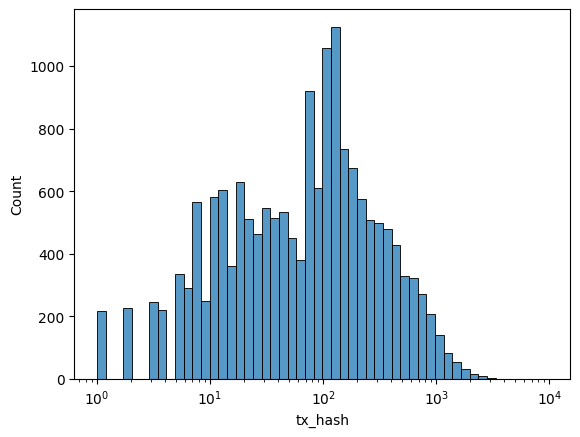

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(n_tx, log_scale=True)